# Prophet(시계열 예측 도구)

### 1. 시계열 예측이 왜 어려운지
### 2. 시계열 예측에 필요한 data 형태가 어떤지

In [1]:
import yfinance as yf
from datetime import date, timedelta
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.make_holidays import make_holidays_df

Importing plotly failed. Interactive plots will not work.


In [2]:
year = 5
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=365*year)
print(start_date, end_date)

nvidia = yf.download(
    tickers = "NVDA", 
    start = start_date,
    end = end_date
)

nvidia.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5688\157510653.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvidia = yf.download(


2020-09-10 2025-09-09


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-09-10,12.274973,13.026222,12.130655,12.950449,698684000
2020-09-11,12.128165,12.614708,11.860218,12.448207,636928000
2020-09-14,12.833797,13.275225,12.593518,13.041925,1201744000
2020-09-15,12.952196,13.259027,12.789434,13.240332,727556000
2020-09-16,12.477118,13.053641,12.476371,12.918546,556384000


In [3]:
nvidia.columns = nvidia.columns.droplevel(1) # 2번째 삭제
nvidia.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-09-10,12.274973,13.026222,12.130655,12.950449,698684000
2020-09-11,12.128165,12.614708,11.860218,12.448207,636928000
2020-09-14,12.833797,13.275225,12.593518,13.041925,1201744000
2020-09-15,12.952196,13.259027,12.789434,13.240332,727556000
2020-09-16,12.477118,13.053641,12.476371,12.918546,556384000


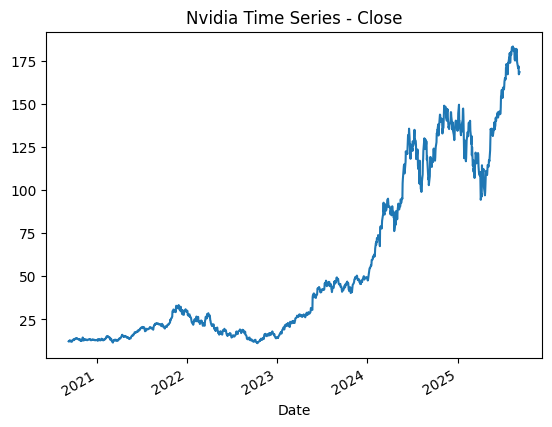

In [4]:
nvidia['Close'].plot()
plt.title('Nvidia Time Series - Close')
plt.show()

In [5]:
data = nvidia.reset_index()[['Date', 'Close']]
print(data) # index를 가지고 data를 가져옴

data = data.rename(columns={'Date' : 'ds', 'Close' : 'y'})
data.head()

Price       Date       Close
0     2020-09-10   12.274973
1     2020-09-11   12.128165
2     2020-09-14   12.833797
3     2020-09-15   12.952196
4     2020-09-16   12.477118
...          ...         ...
1249  2025-09-02  170.779999
1250  2025-09-03  170.619995
1251  2025-09-04  171.660004
1252  2025-09-05  167.020004
1253  2025-09-08  168.309998

[1254 rows x 2 columns]


Price,ds,y
0,2020-09-10,12.274973
1,2020-09-11,12.128165
2,2020-09-14,12.833797
3,2020-09-15,12.952196
4,2020-09-16,12.477118


In [6]:
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet.fit(data)

15:14:41 - cmdstanpy - INFO - Chain [1] start processing
15:14:42 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# 향후 1년 예측
result = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(result)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-09-10,11.167776,0.560392,20.839020
1,2020-09-11,10.668627,0.251207,21.084660
2,2020-09-14,9.930816,-0.484371,20.695378
3,2020-09-15,9.689321,-1.612760,19.813581
4,2020-09-16,9.674493,-0.131992,20.235924
...,...,...,...,...
1614,2026-09-04,195.575053,170.456270,222.379534
1615,2026-09-05,195.325331,170.004852,220.955460
1616,2026-09-06,194.872642,170.248474,220.184388
1617,2026-09-07,194.223111,170.799579,220.612212


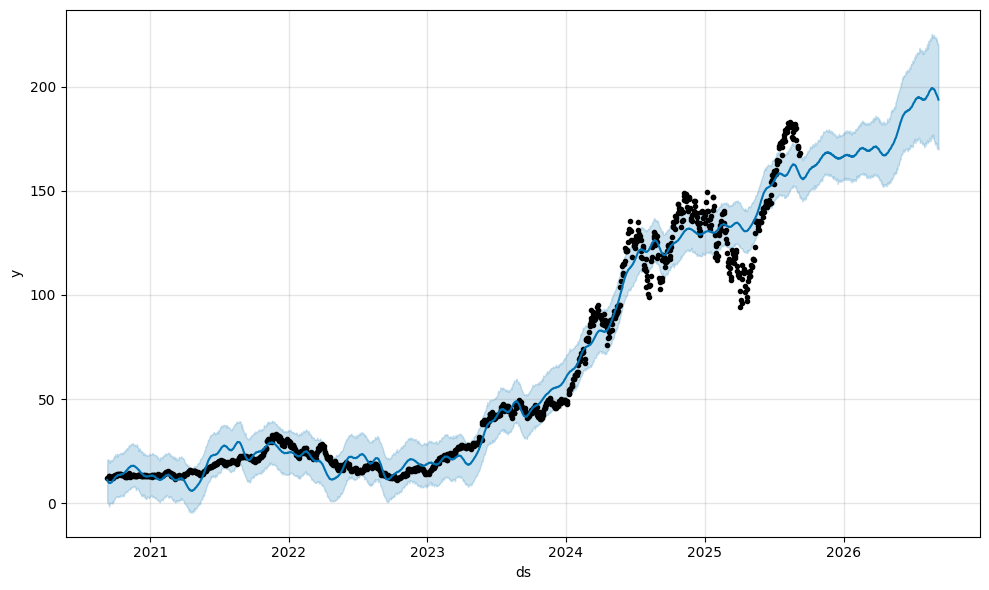

In [8]:
prophet.plot(forecast)
plt.show()

# 변수가 너무 많아서 추세만으로 예측하는 것은 어려움
# LLM을 통해 변수값(뉴스 등)을 추가하여 예측하는 것이 도움이 됨

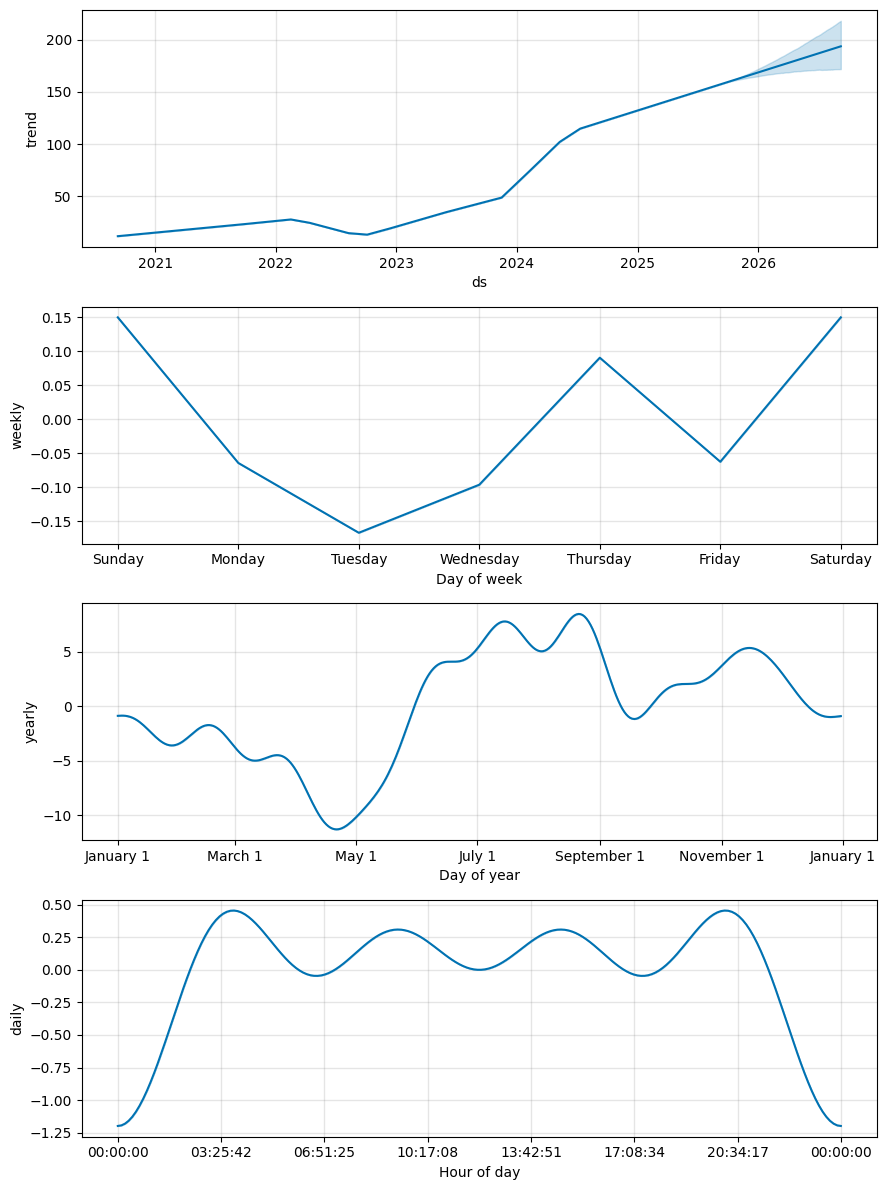

In [9]:
prophet.plot_components(forecast)
plt.show()

In [10]:
holidays = make_holidays_df(
    year_list = [2025],
    country = 'US'
)

holidays

,ds,holiday
0,2025-01-01,New Year's Day
1,2025-05-26,Memorial Day
2,2025-06-19,Juneteenth National Independence Day
3,2025-07-04,Independence Day
4,2025-09-01,Labor Day
5,2025-11-11,Veterans Day
6,2025-11-27,Thanksgiving Day
7,2025-12-25,Christmas Day
8,2025-01-20,Martin Luther King Jr. Day
9,2025-02-17,Washington's Birthday
